## Mean Total Sales Revenue for each cluster and sampling method

In [ ]:
import pandas as pd

mean_revenue_data = {
    'Cluster': [0, 1, 2],
    'SRS': [8739.37, 6184.55, 7135.47],
    'Stratified': [7001.12, 8195.98, 6106.06],
    'Systematic': [7000.56, 6602.32, 7809.46],
    'SRS_5th': [0.00, 0.00, 0.00],
    'SRS_95th': [36540.89, 26807.43, 31004.94],
    'Stratified_5th': [0.00, 0.00, 0.00],
    'Stratified_95th': [29502.81, 33019.36, 27372.18],
    'Systematic_5th': [0.00, 0.00, 0.00],
    'Systematic_95th': [30334.87, 28472.87, 34010.43]
}
mean_revenue_df = pd.DataFrame(mean_revenue_data)

## Mean Non-Churned Revenue for each cluster and sampling method

In [ ]:
non_churn_revenue_data = {
    'Cluster': [0, 1, 2],
    'SRS': [17064.81, 12200.96, 13991.38],
    'Stratified': [13814.63, 15830.98, 12116.10],
    'Systematic': [13686.74, 13016.79, 15881.39]
}
non_churn_revenue_df = pd.DataFrame(non_churn_revenue_data)

## Churn Sensitivity Analysis for each cluster and sampling method

In [ ]:
churn_sensitivity_data = []
churn_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# SRS
srs_churn = {
    0: [15416.33, 13656.50, 12011.36, 10280.10, 8538.42, 6875.17, 5101.23, 3401.18, 1695.87],
    1: [11024.42, 9761.12, 8598.31, 7378.12, 6175.25, 4921.91, 3681.85, 2410.04, 1246.67],
    2: [12477.16, 11070.99, 9699.02, 8291.40, 6902.82, 5582.79, 4178.15, 2836.15, 1372.21]
}

# Stratified
stratified_churn = {
    0: [12476.95, 11024.61, 9729.17, 8314.82, 6877.76, 5510.85, 4179.19, 2822.32, 1382.74],
    1: [14237.11, 12634.62, 11093.22, 9500.11, 7838.33, 6323.38, 4740.51, 3112.10, 1540.20],
    2: [10881.58, 9677.19, 8453.05, 7267.07, 6073.69, 4838.18, 3594.00, 2396.85, 1240.24]
}

# Systematic
systematic_churn = {
    0: [12353.71, 10929.29, 9620.66, 8159.94, 6822.11, 5480.48, 4146.23, 2729.17, 1396.58],
    1: [11695.72, 10384.66, 9065.07, 7864.37, 6564.66, 5213.43, 3838.43, 2573.96, 1301.87],
    2: [14313.48, 12724.18, 11220.49, 9563.88, 7918.79, 6397.06, 4778.58, 3202.00, 1571.99]
}

for cluster in range(3):  # Clusters 0 to 2
    for rate in churn_rates:
        row = {
            'Cluster': cluster,
            'Churn_Rate': rate,
            'SRS': srs_churn.get(cluster, [None]*9)[churn_rates.index(rate)],
            'Stratified': stratified_churn.get(cluster, [None]*9)[churn_rates.index(rate)],
            'Systematic': systematic_churn.get(cluster, [None]*9)[churn_rates.index(rate)]
        }
        churn_sensitivity_data.append(row)

churn_sensitivity_df = pd.DataFrame(churn_sensitivity_data)

# Visualization Code

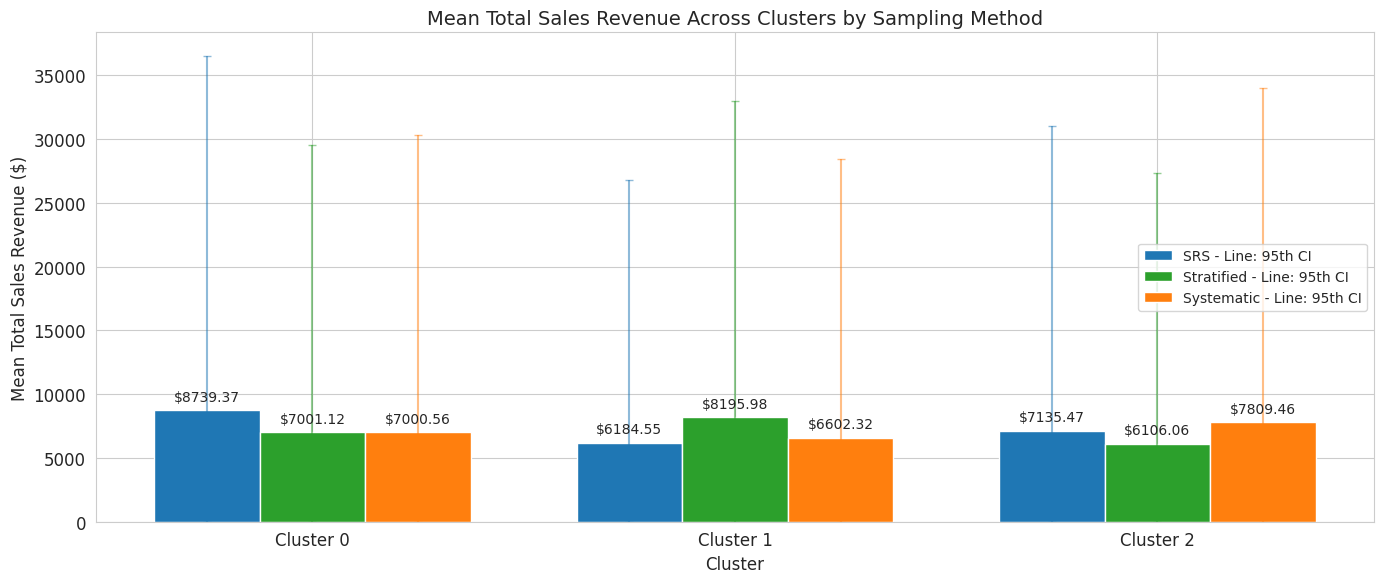

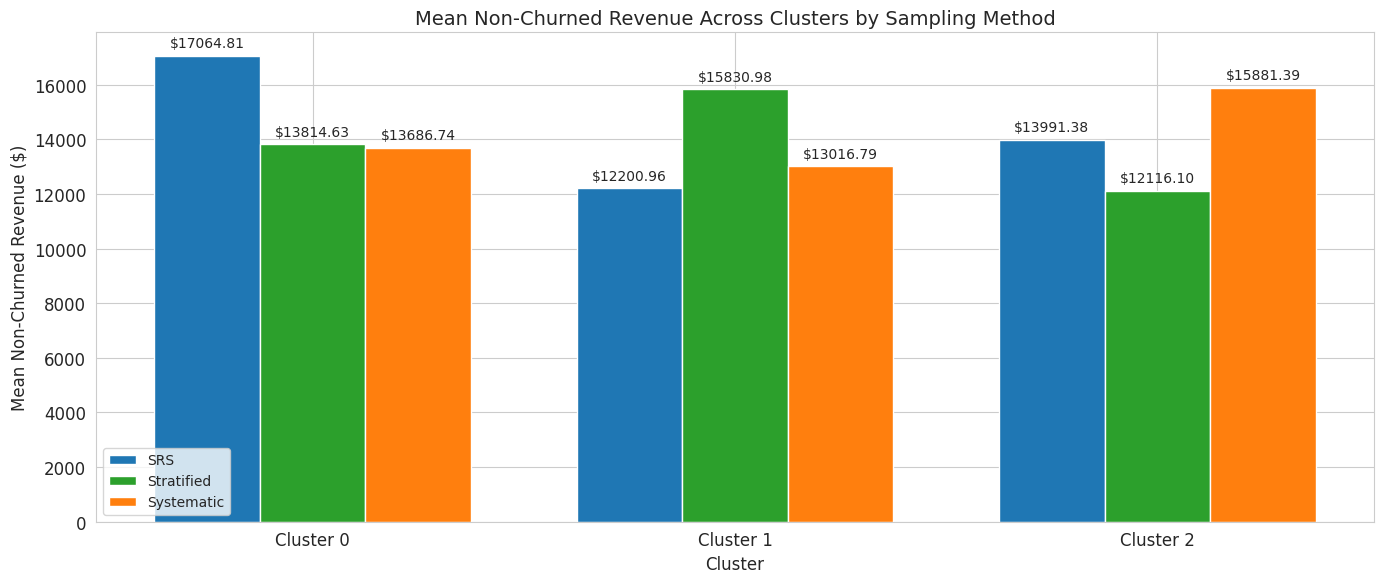

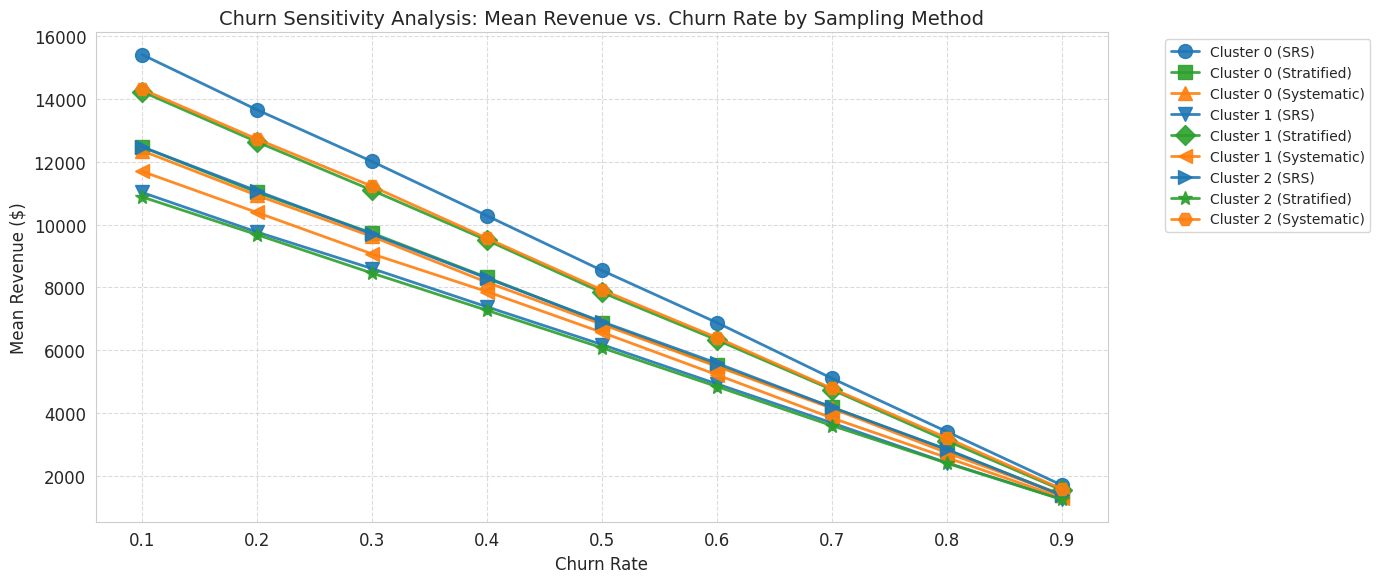

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12, 'legend.fontsize': 10})

# Colors for sampling methods
colors = {'SRS': '#1f77b4', 'Stratified': '#2ca02c', 'Systematic': '#ff7f0e'}
cluster_palette = sns.color_palette("viridis", n_colors=3)  # For clusters in line plot

# Define unique colors and markers for churn sensitivity plot
colors_churn = {
    'Cluster 0 (SRS)': '#1f77b4',
    'Cluster 0 (Stratified)': '#2ca02c',
    'Cluster 0 (Systematic)': '#ff7f0e',
    'Cluster 1 (SRS)': '#1f77b4',
    'Cluster 1 (Stratified)': '#2ca02c',
    'Cluster 1 (Systematic)': '#ff7f0e',
    'Cluster 2 (SRS)': '#1f77b4',
    'Cluster 2 (Stratified)': '#2ca02c',
    'Cluster 2 (Systematic)': '#ff7f0e'
}

markers = {
    'Cluster 0 (SRS)': 'o',
    'Cluster 0 (Stratified)': 's',
    'Cluster 0 (Systematic)': '^',
    'Cluster 1 (SRS)': 'v',
    'Cluster 1 (Stratified)': 'D',
    'Cluster 1 (Systematic)': '<',
    'Cluster 2 (SRS)': '>',
    'Cluster 2 (Stratified)': '*',
    'Cluster 2 (Systematic)': 'H'
}

# 1. Bar Plot of Mean Total Sales Revenue with Percentiles
plt.figure(figsize=(14, 6))
bar_width = 0.25
clusters = mean_revenue_df['Cluster']
x = np.arange(len(clusters))

# Plot bars
plt.bar(x - bar_width, mean_revenue_df['SRS'], bar_width, label='SRS - Line: 95th CI', color=colors['SRS'])
plt.bar(x, mean_revenue_df['Stratified'], bar_width, label='Stratified - Line: 95th CI', color=colors['Stratified'])
plt.bar(x + bar_width, mean_revenue_df['Systematic'], bar_width, label='Systematic - Line: 95th CI', color=colors['Systematic'])

# Add error bars for 5th and 95th percentiles
for i, row in mean_revenue_df.iterrows():
    for method, color in colors.items():
        if pd.notna(row[method]):
            plt.errorbar(i + (list(colors.keys()).index(method) - 1) * bar_width, row[method],
                         yerr=[[row[method] - row[f'{method}_5th']], [row[f'{method}_95th'] - row[method]]],
                         fmt='none', c=color, capsize=3, alpha=0.5)
            plt.text(i + (list(colors.keys()).index(method) - 1) * bar_width, row[method] + 500,
                     f'${row[method]:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(x, [f'Cluster {int(c)}' for c in clusters])
plt.title('Mean Total Sales Revenue Across Clusters by Sampling Method', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Mean Total Sales Revenue ($)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bar Plot of Mean Non-Churned Revenue
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, non_churn_revenue_df['SRS'], bar_width, label='SRS', color=colors['SRS'])
plt.bar(x, non_churn_revenue_df['Stratified'], bar_width, label='Stratified', color=colors['Stratified'])
plt.bar(x + bar_width, non_churn_revenue_df['Systematic'], bar_width, label='Systematic', color=colors['Systematic'])

# Annotate bars with mean values
for i, row in non_churn_revenue_df.iterrows():
    for method, color in colors.items():
        if pd.notna(row[method]):
            plt.text(i + (list(colors.keys()).index(method) - 1) * bar_width, row[method] + 200,
                     f'${row[method]:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(x, [f'Cluster {int(c)}' for c in clusters])
plt.title('Mean Non-Churned Revenue Across Clusters by Sampling Method', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Mean Non-Churned Revenue ($)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Line Plot for Churn Sensitivity Analysis
plt.figure(figsize=(14, 6))
for cluster in churn_sensitivity_df['Cluster'].unique():
    cluster_data = churn_sensitivity_df[churn_sensitivity_df['Cluster'] == cluster]
    plt.plot(cluster_data['Churn_Rate'], cluster_data['SRS'], marker=markers[f'Cluster {cluster} (SRS)'],
             label=f'Cluster {cluster} (SRS)', color=colors_churn[f'Cluster {cluster} (SRS)'], linestyle='-', linewidth=2, markersize=10, alpha=0.9)
    plt.plot(cluster_data['Churn_Rate'], cluster_data['Stratified'], marker=markers[f'Cluster {cluster} (Stratified)'],
             label=f'Cluster {cluster} (Stratified)', color=colors_churn[f'Cluster {cluster} (Stratified)'], linestyle='-', linewidth=2, markersize=10, alpha=0.9)
    plt.plot(cluster_data['Churn_Rate'], cluster_data['Systematic'], marker=markers[f'Cluster {cluster} (Systematic)'],
             label=f'Cluster {cluster} (Systematic)', color=colors_churn[f'Cluster {cluster} (Systematic)'], linestyle='-', linewidth=2, markersize=10, alpha=0.9)

plt.title('Churn Sensitivity Analysis: Mean Revenue vs. Churn Rate by Sampling Method', fontsize=14)
plt.xlabel('Churn Rate', fontsize=12)
plt.ylabel('Mean Revenue ($)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()